#### Installs and imports section

##### Imports

In [18]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats  # Importing stats from scipy for Z-score calculation

# Machine learning and metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay


##### Installs

# TASK 2 - Predicting customer buying behaviour

## Step 1: Loading and Exploring the Dataset

In this step, the customer booking dataset is loaded, and the basic structure of the dataset is explored. Understanding the shape, column data types, and potential missing values is essential to start the analysis.

In [19]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

## Step 2: Handling the 'flight_day' Feature
The 'flight_day' column contains abbreviations of weekdays (e.g., "Mon", "Tue"). To make this data more useful for machine learning algorithms, it is transformed into numerical values. This step maps each day of the week to a corresponding number.

In [21]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [22]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [23]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

## Step 3: Descriptive Statistics and Visualizing the Distribution of Numerical Features
This step provides summary statistics for numerical columns and visualizes their distributions using histograms.

In [24]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<Figure size 1500x1200 with 0 Axes>

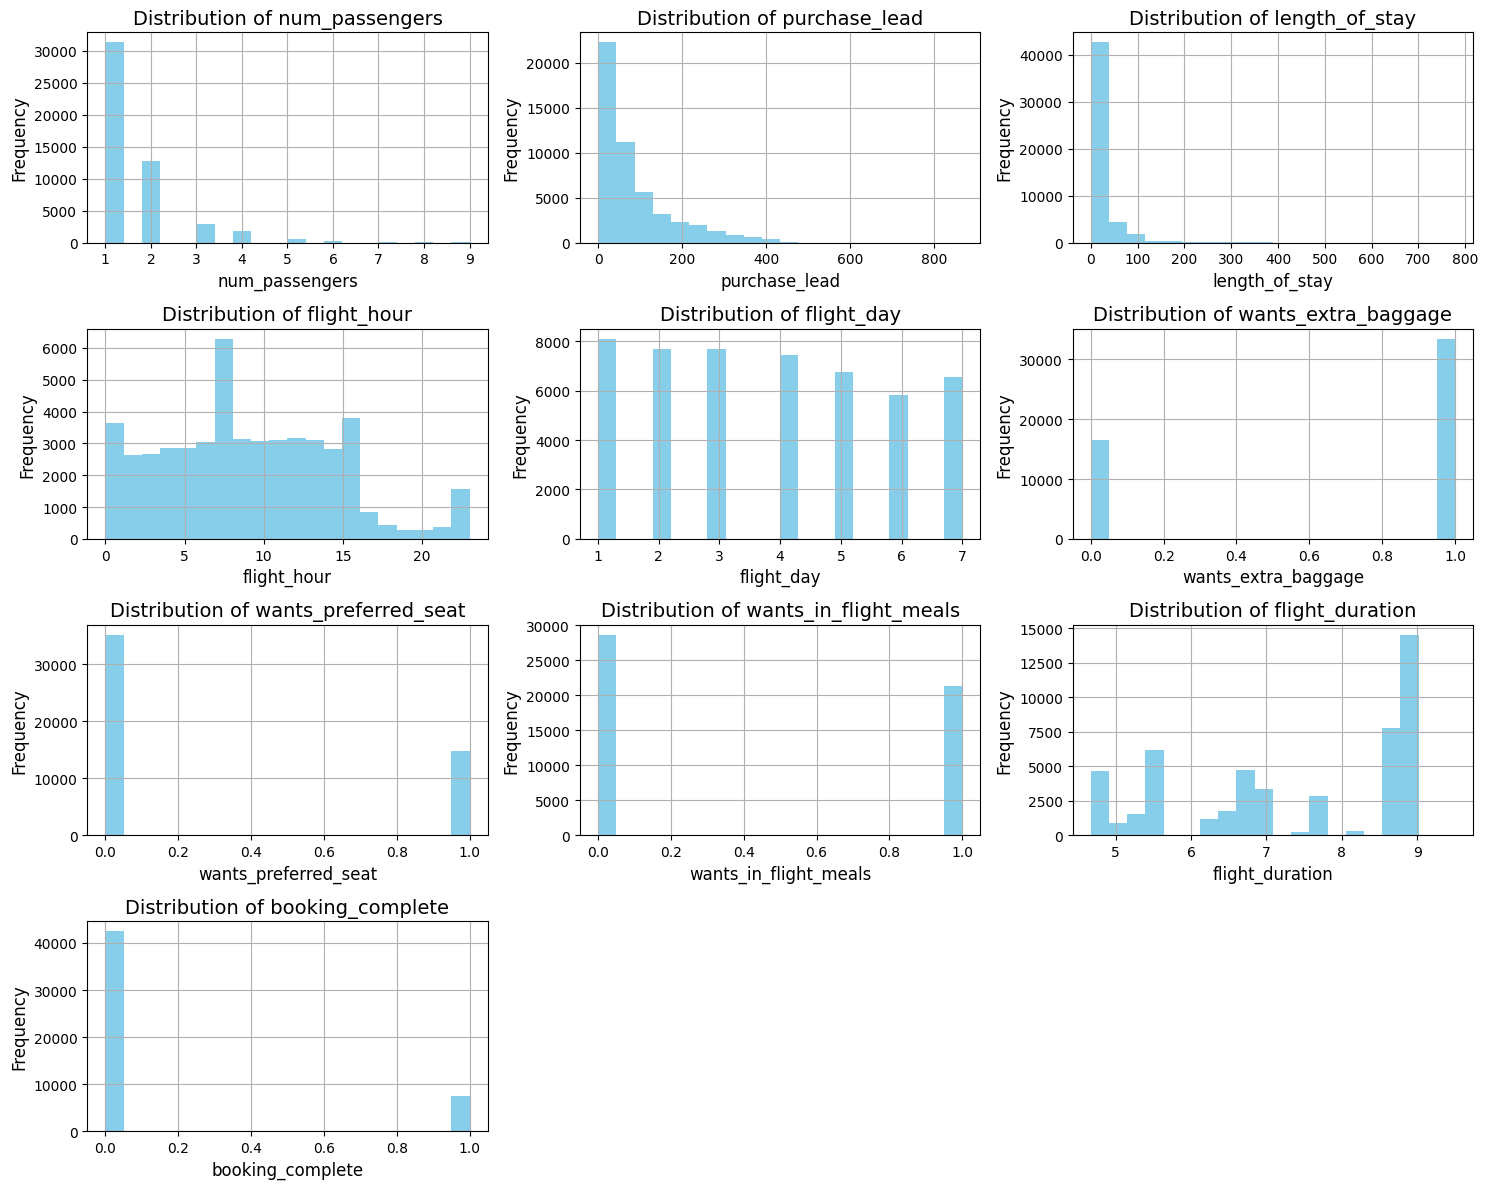

In [25]:
# Plot the distribution of numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


# df[numerical_columns].hist(bins=20, figsize=(15, 12), layout=(4, 3))
# plt.tight_layout()
# plt.show()


plt.figure(figsize=(15, 12))
ax = df[numerical_columns].hist(bins=20, figsize=(15, 12), layout=(4, 3), color='skyblue')

# Loop through the axes to add titles and axis labels
for i, axes_row in enumerate(ax):
    for j, axes in enumerate(axes_row):
        col = numerical_columns[i * 3 + j] if i * 3 + j < len(numerical_columns) else None
        if col:
            axes.set_title(f'Distribution of {col}', fontsize=14)
            axes.set_xlabel(f'{col}', fontsize=12)
            axes.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


## Step 4: Correlation Heatmap
In this step, a correlation matrix is generated to visualize the relationships between numerical features. Identifying correlations between features helps to avoid multicollinearity, which can negatively affect the performance of machine learning models.

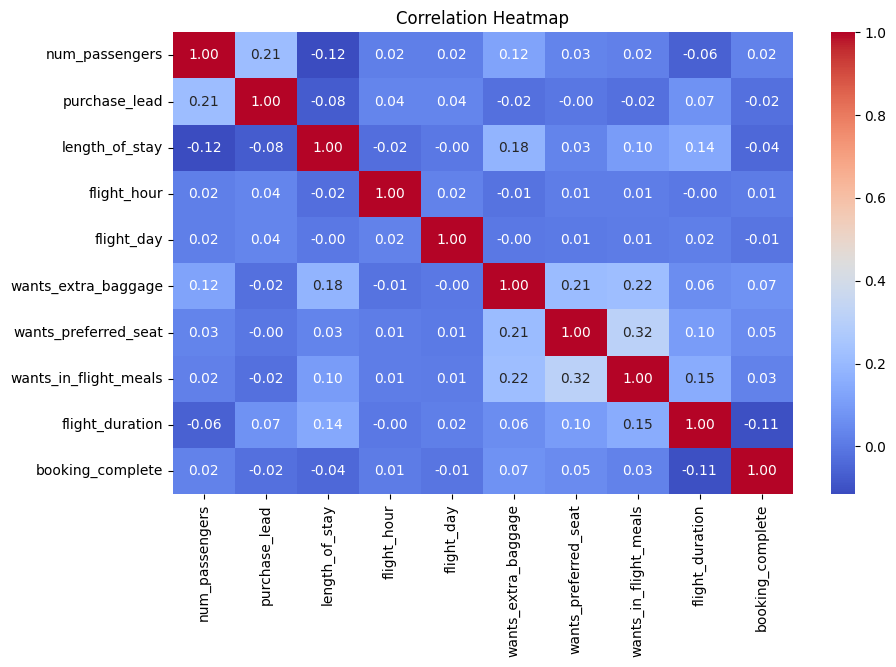

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Step 5: Outliers Detection and Visualization
Outliers can distort model performance, so this step detects outliers using IQR and Z-score methods and visualizes them using boxplots. Relevant columns for outlier detection include:

- purchase_lead (lead time before booking)
- length_of_stay (number of days)
- flight_hour
- flight_duration
- num_passengers

Detecting Outliers with IQR and Z-scores:

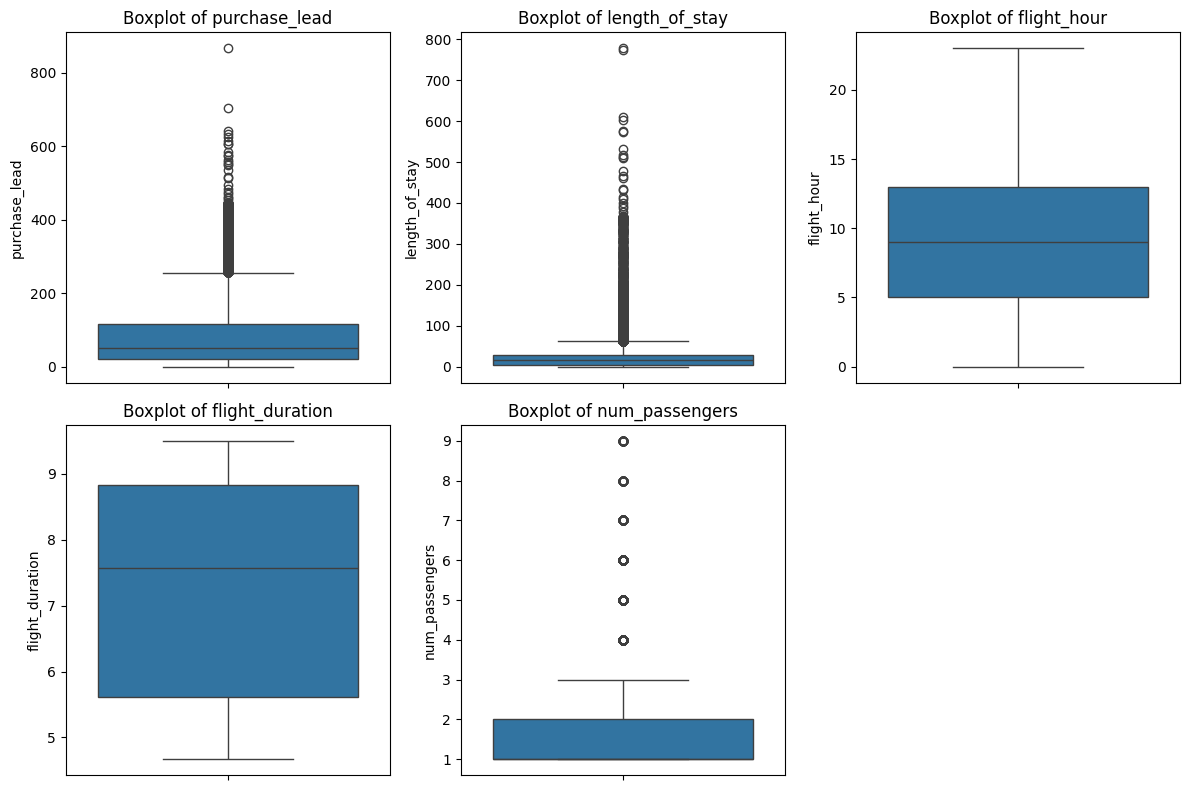

In [27]:
# Step 1: Detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
        outliers_indices[col] = outliers.index
    return outliers_indices

# Step 2: Detect outliers using Z-scores
def detect_outliers_zscore(df, columns, threshold=3):
    outliers_indices = {}
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = np.where(z_scores > threshold)[0]
        outliers_indices[col] = outliers
    return outliers_indices

# Step 3: Visualization using boxplots for each column
numerical_columns_to_check = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'num_passengers']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Step 4: Detect outliers using IQR
iqr_outliers = detect_outliers_iqr(df, numerical_columns_to_check)

# Step 5: Detect outliers using Z-scores
zscore_outliers = detect_outliers_zscore(df, numerical_columns_to_check)

the same is done for the categorical columns:
- booking_origin
- sales_channel
- trip_type

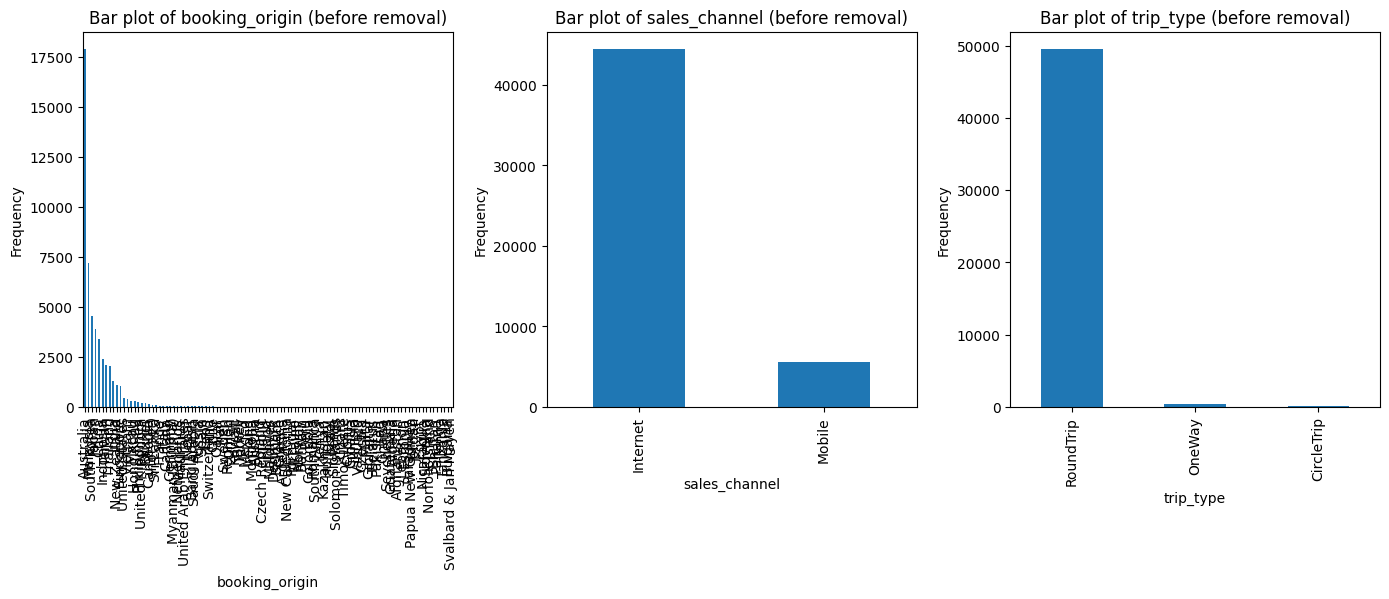

In [28]:
# Categorical columns to check
categorical_columns = ['booking_origin', 'sales_channel', 'trip_type']

# Plot the distributions of categorical columns BEFORE removing rare categories
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar plot of {col} (before removal)")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Step 6: Removing Outliers
Outliers detected using both the IQR and Z-score methods are removed from the dataset.

In [29]:
# Step 6: Remove outliers (combining IQR and Z-score detection)
def remove_outliers(df, iqr_outliers, zscore_outliers):
    combined_indices = set()
    for col in numerical_columns_to_check:
        combined_indices.update(iqr_outliers[col])
        combined_indices.update(zscore_outliers[col])
    df_cleaned = df.drop(list(combined_indices), axis=0)
    return df_cleaned

# Remove outliers from the dataset
df_cleaned = remove_outliers(df, iqr_outliers, zscore_outliers)

# Checking the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")


Original dataset shape: (50000, 14)
Dataset shape after removing outliers: (40456, 14)


In [30]:
### CATEGORICAL OUTLIER REMOVAL ###

# Step 7: Remove categorical outliers from a column
def remove_categorical_outliers(df, column, threshold=0.01):
    # Calculate the frequency of each category
    freq = df[column].value_counts(normalize=True)
    
    # Categories that appear less than the threshold percentage
    rare_categories = freq[freq < threshold].index
    
    # Remove rows where the column contains rare categories
    df_cleaned = df[~df[column].isin(rare_categories)]
    
    return df_cleaned

# Apply the function to remove rare categories from categorical columns
for column in categorical_columns:
    df_cleaned = remove_categorical_outliers(df_cleaned, column, threshold=0.01)

# Checking the shape of the dataset after removing both numerical and categorical outliers
print(f"Dataset shape after removing categorical outliers: {df_cleaned.shape}")

Dataset shape after removing categorical outliers: (37369, 14)


## Step 7: Feature Engineering
This step involves creating new features that may improve model performance. Features like flight time segments, booking lead categories, and flight efficiency are generated. Additionally, the dataset is prepared by splitting the 'route' feature and aggregating preferences for additional services.

In [31]:
# Data Preprocessing and Feature Engineering

# 1. Booking Time Segment
def categorize_flight_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the segmentation function to create a new column
df_cleaned['flight_time_segment'] = df_cleaned['flight_hour'].apply(categorize_flight_hour)

# 2. Booking Lead Category
def categorize_purchase_lead(lead_time):
    if lead_time > 200:
        return 'Early Booking'
    elif lead_time > 50:
        return 'Medium Booking'
    else:
        return 'Last Minute Booking'

# Apply the categorization function to create a new column
df_cleaned['booking_lead_category'] = df_cleaned['purchase_lead'].apply(categorize_purchase_lead)

# 3. Split the 'route' into departure and destination
df_cleaned['route_split'] = df_cleaned['route'].apply(lambda x: x.split('->') if '->' in x else [None, None])
df_cleaned['departure_airport'] = df_cleaned['route_split'].apply(lambda x: x[0] if x[0] else 'Unknown')
df_cleaned['destination_airport'] = df_cleaned['route_split'].apply(lambda x: x[1] if len(x) > 1 else 'Unknown')

# Dropping the helper 'route_split' column
df_cleaned.drop('route_split', axis=1, inplace=True)

# 4. Country-Specific Features (keep top 5 booking origin countries)
top_countries = df_cleaned['booking_origin'].value_counts().nlargest(5).index
df_cleaned['major_country'] = df_cleaned['booking_origin'].apply(lambda x: x if x in top_countries else 'Other')

# 5. Flight Efficiency (flight_duration / length_of_stay)
df_cleaned['flight_efficiency'] = df_cleaned['flight_duration'] / df_cleaned['length_of_stay']

# 6. Aggregated Preferences - Total Extras
df_cleaned['total_extras'] = df_cleaned['wants_extra_baggage'] + df_cleaned['wants_preferred_seat'] + df_cleaned['wants_in_flight_meals']

# 7. Weekday or Weekend Flight
df_cleaned['weekend_flight'] = df_cleaned['flight_day'].apply(lambda x: 1 if x in [6, 7] else 0)



## Step 8: Encoding Categorical Variables
In this step, categorical variables are encoded using one-hot encoding. This transformation is necessary because machine learning models cannot directly interpret categorical text data. After encoding, redundant columns are dropped to avoid multicollinearity.

In [32]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['flight_time_segment', 'booking_lead_category', 'departure_airport', 
                                         'destination_airport', 'major_country'], drop_first=True)

# Apply one-hot encoding to the remaining categorical columns 'sales_channel' and 'trip_type'
df_encoded = pd.get_dummies(df_encoded, columns=['sales_channel', 'trip_type'], drop_first=True)

# Drop the now redundant columns 'route', 'booking_origin'
df_encoded.drop(['route', 'booking_origin'], axis=1, inplace=True)

# Replace infinite values and drop NaNs
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
df_encoded.dropna(inplace=True)


# Check the final dataset after feature engineering
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,flight_time_segment_Morning,flight_time_segment_Night,booking_lead_category_Last Minute Booking,booking_lead_category_Medium Booking,major_country_China,major_country_Japan,major_country_Malaysia,major_country_Other,major_country_South Korea,sales_channel_Mobile
1,1,112,20,3,6,0,0,0,5.52,0,...,False,True,False,True,False,False,False,True,False,False
2,2,243,22,17,3,1,1,0,5.52,0,...,False,False,False,False,False,False,False,True,False,False
3,1,96,31,4,6,0,0,1,5.52,0,...,False,True,False,True,False,False,False,True,False,False
4,2,68,22,15,3,1,0,1,5.52,0,...,False,False,False,True,False,False,False,True,False,False
5,1,3,48,20,4,1,0,1,5.52,0,...,False,False,True,False,False,False,False,True,False,False


## Step 9: Checking for Class Imbalance
This step checks whether the target variable booking_complete is balanced or imbalanced. In an imbalanced dataset, one class significantly outnumbers the other, which can bias the model’s predictions. If the dataset is imbalanced, techniques like class weighting or sampling methods can be applied to address the issue.

booking_complete
0    0.854528
1    0.145472
Name: proportion, dtype: float64


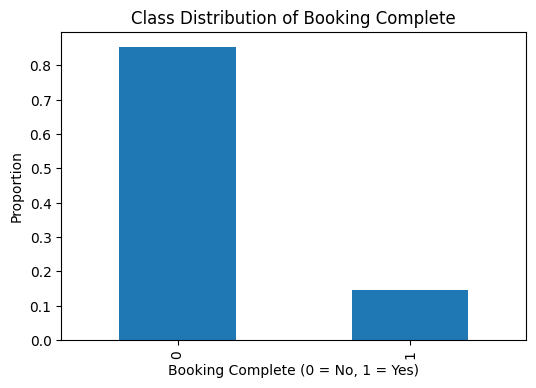

In [33]:
# Check the balance of the target variable 'booking_complete'
class_distribution = df_encoded['booking_complete'].value_counts(normalize=True)
print(class_distribution)

# Visualize the class distribution
plt.figure(figsize=(6,4))
class_distribution.plot(kind='bar')
plt.title("Class Distribution of Booking Complete")
plt.ylabel("Proportion")
plt.xlabel("Booking Complete (0 = No, 1 = Yes)")
plt.show()

## Step 10: Model Training: RandomForestClassifier
The data is split into training and testing sets in this step. A RandomForestClassifier is trained using predefined hyperparameters, and the model is then used to make predictions on the test set.

In [34]:
# Split the data into training and testing sets
X = df_encoded.drop('booking_complete', axis=1)  # Features
y = df_encoded['booking_complete']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=10)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions with probabilities
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold to predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


## Step 11: Model Evaluation
The performance of the RandomForest model is evaluated using several metrics, including accuracy, balanced accuracy, F1 score, and ROC AUC. The ROC curve is plotted to show the tradeoff between true positive and false positive rates. Additionally, a confusion matrix is displayed to better understand the model's performance (counts of true positives, true negatives, false positives, and false negatives).

{'Best Parameters': {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}, 'Accuracy (Optimal Threshold)': 0.6962804388546963, 'Balanced Accuracy (Optimal Threshold)': 0.701969794521337, 'F1 Score (Optimal Threshold)': 0.40482433141059254, 'ROC AUC (Optimal Threshold)': 0.701969794521337}
Balanced Accuracy (Optimal Threshold): 0.701969794521337
Confusion Matrix:
[[6648 2932]
 [ 473 1158]]


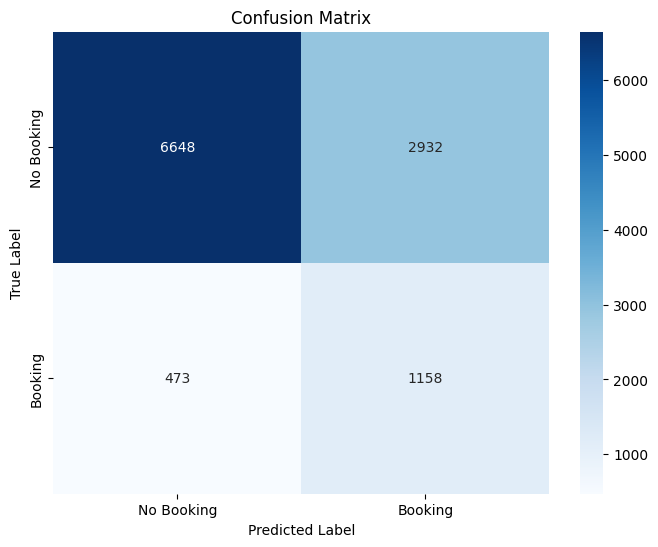

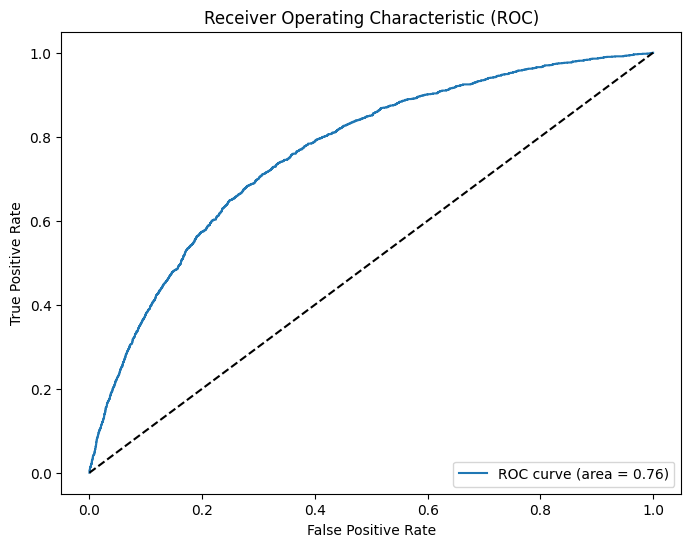

In [35]:
# Calculate metrics with the optimal threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
balanced_acc_optimal = balanced_accuracy_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)
roc_auc_optimal = roc_auc_score(y_test, y_pred_optimal)

# Display the metrics after threshold tuning
optimal_metrics = {
    "Best Parameters": best_params,
    "Accuracy (Optimal Threshold)": accuracy_optimal,
    "Balanced Accuracy (Optimal Threshold)": balanced_acc_optimal,
    "F1 Score (Optimal Threshold)": f1_optimal,
    "ROC AUC (Optimal Threshold)": roc_auc_optimal
}

print(optimal_metrics)


print("Balanced Accuracy (Optimal Threshold):",  balanced_acc_optimal)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
print(f"Confusion Matrix:\n{cm}")

# Plot the Confusion Matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Booking', 'Booking'], yticklabels=['No Booking', 'Booking'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



## Step 12: Features Importance
In this step, the feature importance is plotted to show which features contributed most to the predictions made by the RandomForest model. This helps interpret the model's behavior and understand what factors influence customer bookings the most.

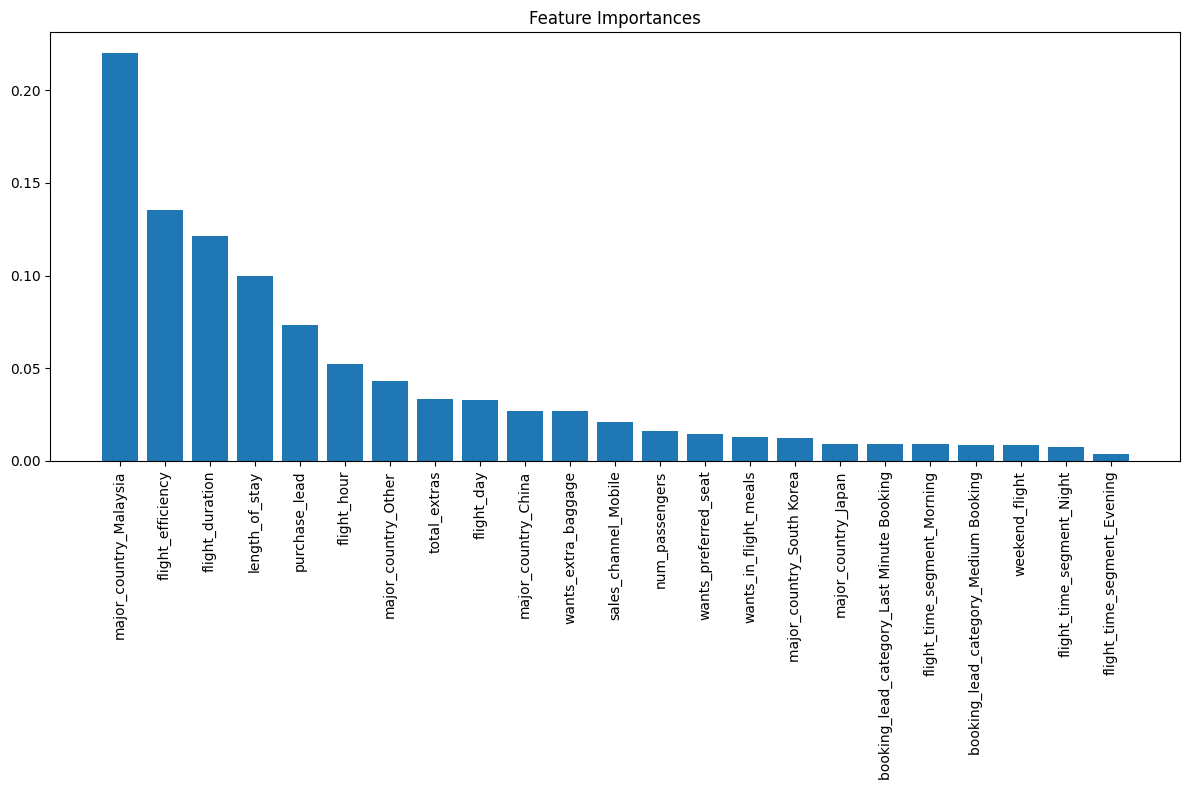

In [36]:
# FEATURE IMPORTANCE
# Get feature importances from the model
feature_importances = best_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
